In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib notebook

import seaborn as sns

In [14]:
plt.style.use("seaborn-colorblind")

In [15]:
data = pd.read_csv("C:/Users/VARUN/Desktop/AirPollution/Dataset/cpcb_dly_aq_gujarat-2014.csv")

In [16]:
data.head()

,Stn Code,Sampling Date,State,City/Town/Village/Area,Location of Monitoring Station,Agency,Type of Location,SO2,NO2,RSPM/PM10,PM 2.5
0,101,01-06-14,Gujarat,Ahmedabad,"Naroda, G.I.D.C., Ahmadabad",Gujarat State Pollution Control Board,Industrial Area,11.283333,12.983333,90.666667,22
1,101,01-09-14,Gujarat,Ahmedabad,"Naroda, G.I.D.C., Ahmadabad",Gujarat State Pollution Control Board,Industrial Area,13.116667,15.833333,74.666667,24
2,101,13-01-14,Gujarat,Ahmedabad,"Naroda, G.I.D.C., Ahmadabad",Gujarat State Pollution Control Board,Industrial Area,13.900000,18.116667,87.333333,20
3,101,16-01-14,Gujarat,Ahmedabad,"Naroda, G.I.D.C., Ahmadabad",Gujarat State Pollution Control Board,Industrial Area,16.133333,15.883333,56.666667,19
4,101,20-01-14,Gujarat,Ahmedabad,"Naroda, G.I.D.C., Ahmadabad",Gujarat State Pollution Control Board,Industrial Area,14.616667,14.966667,77.666667,25


In [17]:
dates = ['-'.join(i.split('-')[1:]) for i in data['Sampling Date']]

In [18]:
data['Sampling Date'] = dates

In [19]:
for i in range(len(data['City/Town/Village/Area'])):
    if data['City/Town/Village/Area'][i] != 'Ahmedabad':
        data.drop(i, inplace = True)

In [20]:
data.head()

,Stn Code,Sampling Date,State,City/Town/Village/Area,Location of Monitoring Station,Agency,Type of Location,SO2,NO2,RSPM/PM10,PM 2.5
0,101,06-14,Gujarat,Ahmedabad,"Naroda, G.I.D.C., Ahmadabad",Gujarat State Pollution Control Board,Industrial Area,11.283333,12.983333,90.666667,22
1,101,09-14,Gujarat,Ahmedabad,"Naroda, G.I.D.C., Ahmadabad",Gujarat State Pollution Control Board,Industrial Area,13.116667,15.833333,74.666667,24
2,101,01-14,Gujarat,Ahmedabad,"Naroda, G.I.D.C., Ahmadabad",Gujarat State Pollution Control Board,Industrial Area,13.900000,18.116667,87.333333,20
3,101,01-14,Gujarat,Ahmedabad,"Naroda, G.I.D.C., Ahmadabad",Gujarat State Pollution Control Board,Industrial Area,16.133333,15.883333,56.666667,19
4,101,01-14,Gujarat,Ahmedabad,"Naroda, G.I.D.C., Ahmadabad",Gujarat State Pollution Control Board,Industrial Area,14.616667,14.966667,77.666667,25


In [21]:
data = data.groupby("Sampling Date").mean()
data

,Stn Code,SO2,NO2,RSPM/PM10,PM 2.5
Sampling Date,,,,,
01-14,160.333333,14.092063,18.812302,77.888889,25.261905
02-14,160.333333,14.098016,19.556349,81.484127,26.666667
03-14,160.423729,13.810169,18.443785,82.853107,28.084746
04-14,162.235294,13.790196,19.584804,86.029412,31.529412
05-14,160.209302,13.631008,21.212016,92.573643,32.906977
06-14,160.446809,13.129078,19.704610,82.390071,27.617021
07-14,161.739130,12.593478,20.276957,84.420290,30.282609
08-14,160.333333,12.495602,20.660417,90.097222,34.416667
09-14,160.333333,13.709722,19.730556,81.444444,27.750000


In [22]:
data = data.groupby("Sampling Date").mean().drop("PM 2.5", axis=1)

In [23]:
data

,Stn Code,SO2,NO2,RSPM/PM10
Sampling Date,,,,
01-14,160.333333,14.092063,18.812302,77.888889
02-14,160.333333,14.098016,19.556349,81.484127
03-14,160.423729,13.810169,18.443785,82.853107
04-14,162.235294,13.790196,19.584804,86.029412
05-14,160.209302,13.631008,21.212016,92.573643
06-14,160.446809,13.129078,19.704610,82.390071
07-14,161.739130,12.593478,20.276957,84.420290
08-14,160.333333,12.495602,20.660417,90.097222
09-14,160.333333,13.709722,19.730556,81.444444


<IPython.core.display.Javascript object>


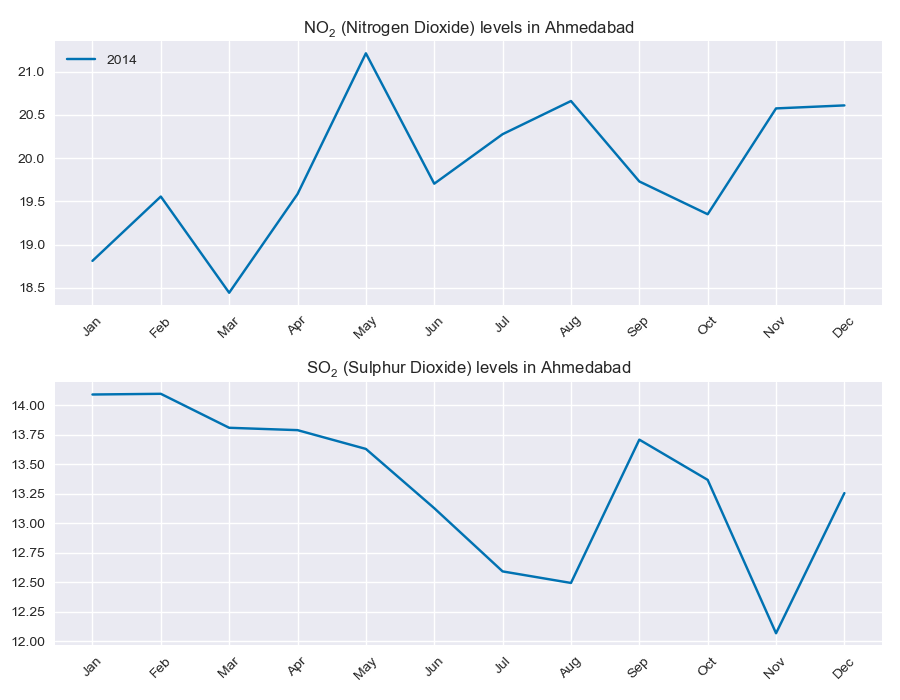

In [24]:
plt.figure(figsize=(9, 7))
plt.subplot(211)
plt.cla()
plotter = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul', 'Aug', 'Sep',
           'Oct', 'Nov', 'Dec']
x = np.arange(0,len(data["NO2"]),1)
ax = plt.gca()
ax.plot(x, data["NO2"])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks(x)
plt.xticks(rotation=45)
plt.subplots_adjust(bottom=0.2)
plt.legend([2014],loc=2)
plt.title("$\mathregular{NO_2}$ (Nitrogen Dioxide) levels in Ahmedabad")
ax.set_xticklabels(plotter)

plt.subplot(212)
plt.cla()
plotter = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul', 'Aug', 'Sep',
           'Oct', 'Nov', 'Dec']
x = np.arange(0,len(data["SO2"]),1)
ax = plt.gca()
ax.plot(x, data["SO2"])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks(x)
plt.xticks(rotation=45)
plt.title("$\mathregular{SO_2}$ (Sulphur Dioxide) levels in Ahmedabad")
ax.set_xticklabels(plotter)

plt.tight_layout()
#plt.show()